In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [103]:
df = pd.read_csv('D:\Y3S1\projects\FDM_Project\Disease_predictiig_system\Data\Disease_dataset.csv')
df.head()

,Record_ID,Record_Date,Age,Gender,Ethnicity,Living_Area,Family_History,Smoking,Alcohol,Diet_Habits,...,Special_Symptom_2,Special_Symptom_3,Symptom_Duration,Symptom_Severity,Duration_Days,Total_Symptoms,Risk_Score_0_10,BMI_Category,Disease,Specialist
0,1,21/10/2024,68,male,Caucasian,Rural,Yes,Daily,Social,HEALTHY,...,Shortness of breath,Rapid breathing,1 week,Mild,7,2,7.79,Overweight,Asthma,Pulmonologist
1,2,07/11/2024,14,male,Other,Urban,Yes,No,Frequent,balanced,...,NaN,NaN,1+ month,Moderate,30,2,4.03,Normal,Hypertension,Cardiologist
2,3,08/09/2024,71,Male,Asian,Rural,No,No,No,processd food,...,NaN,NaN,1+ month,Moderate,30,3,7.11,Overweight,Asthma,Pulmonologist
3,4,28/01/2024,80,Male,Caucasian,Urban,Yes,No,No,HEALTHY,...,Daytime fatigue,Excessive sweating,1 week,Moderate,7,1,6.44,Obese,Obesity,Nutritionist
4,5,08/11/2023,16,female,African American,Rural,Yes,No,Social,Processd Food,...,NaN,NaN,1 week,Mild,7,1,2.28,Normal,Influenza,General Practitioner


In [104]:
print("Original shape of the dataset:", df.shape)

Original shape of the dataset: (12070, 28)


In [105]:
# Drop unwanted columns
DROP_COLS = [
    "Record_ID", "Record_Date", "Living_Area",
    "Risk_Score", "risr score", "Risk_Score_0_10",
    "Severity_Cat", "Specialist",
    "Symptom_Severity", "Symptom_Duration", "Total_Symptoms"  # <- DROPPED
]

df = df.drop(columns=[c for c in DROP_COLS if c in df.columns], errors="ignore")
print('After dropping unwanted columns, the shape of the dataset is:', df.shape)

After dropping unwanted columns, the shape of the dataset is: (12070, 20)


In [106]:
df.isnull().sum()

Age                           0
Gender                        0
Ethnicity                   726
Family_History                0
Smoking                       0
Alcohol                     726
Diet_Habits                 726
Physical_Activity             0
Pre_existing_Conditions    2380
Current_Medications        3033
Symptom_Cough                 0
Symptom_Fever                 0
Symptom_ChestPain             0
Symptom_Fatigue               0
Special_Symptom_1          2415
Special_Symptom_2          2415
Special_Symptom_3          2415
Duration_Days                 0
BMI_Category                  0
Disease                       0
dtype: int64

In [107]:
print('Total number of null values in the dataset:', df.isnull().sum().sum())

Total number of null values in the dataset: 14836


In [108]:
print('Toal number of duplicate rows:', df.duplicated().sum())

Toal number of duplicate rows: 2


In [109]:
# Remove duplicates
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

After dropping duplicates: (12068, 20)


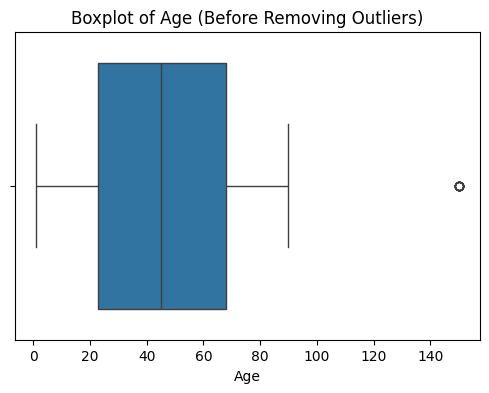

In [110]:
# --- Boxplot BEFORE removing outliers for Age---
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"])   # raw age values (with outliers)
plt.title("Boxplot of Age (Before Removing Outliers)")
plt.show()

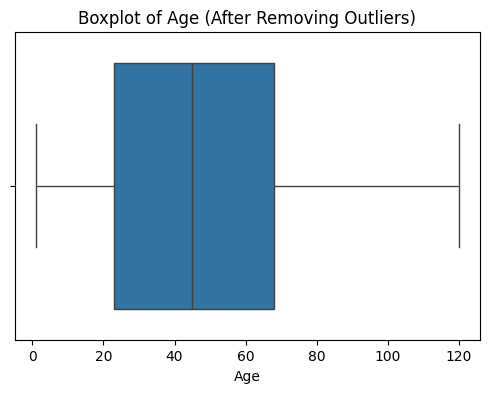

In [111]:
# Handle outliers for Age
if "Age" in df.columns:
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce").clip(0, 120)

# Draw boxplot AFTER outlier removal for Age
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age (After Removing Outliers)")
plt.show()



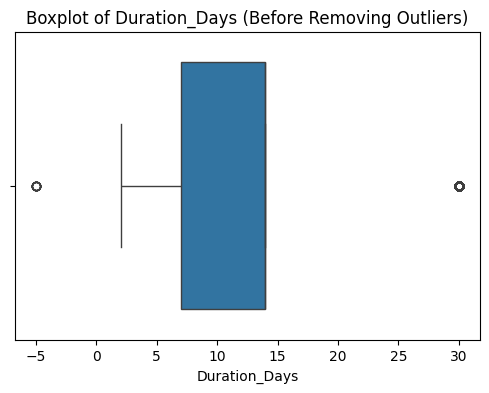

In [112]:
# --- Boxplot BEFORE removing outliers for Duration_Days---
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Duration_Days"])   
plt.title("Boxplot of Duration_Days (Before Removing Outliers)")
plt.show()

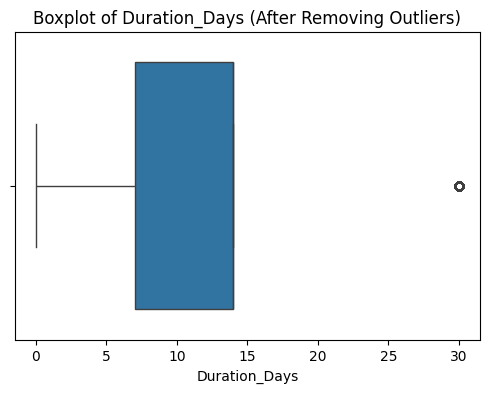

In [113]:
# Handle outliers for Duration_Days
if "Duration_Days" in df.columns:
    df["Duration_Days"] = pd.to_numeric(df["Duration_Days"], errors="coerce").clip(0, 120)

# Draw boxplot AFTER outlier removal for Duration_Days
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Duration_Days"])
plt.title("Boxplot of Duration_Days (After Removing Outliers)")
plt.show()


In [114]:
# Before Normalize Age columns
print("Before Normalize Gender columns",df['Gender'].head())

Before Normalize Gender columns 0      male
1      male
2      Male
3      Male
4    female
Name: Gender, dtype: object


In [115]:
#  Normalize Age columns

if "Gender" in df.columns:
    df["Gender"] = df["Gender"].astype(str).str.strip().str.capitalize()

if "Diet_Habits" in df.columns:
    df["Diet_Habits"] = df["Diet_Habits"].astype(str).str.strip().str.title()

for col in ["Special_Symptom_1", "Special_Symptom_2", "Special_Symptom_3", "Alcohol","Ethnicity","Diet_Habits"
            "Current_Medications", "Pre_existing_Conditions",]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace(["nan", "NaN", ""],np.nan)

print("Normalized Gender columns",df['Gender'].head())        

Normalized Gender columns 0      Male
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object


In [116]:
# Before Normalize ADiet_Habitsge columns
print("Before Normalize Diet_Habits columns",df['Diet_Habits'].head())

Before Normalize Diet_Habits columns 0          Healthy
1         Balanced
2    Processd Food
3          Healthy
4    Processd Food
Name: Diet_Habits, dtype: object


In [117]:
# After Normalize Diet_Habits columns

if "Diet_Habits" in df.columns:
    df["Diet_Habits"] = df["Diet_Habits"].astype(str).str.strip().str.title()

print("Normalized Diet_Habits columns",df['Diet_Habits'].head())     

Normalized Diet_Habits columns 0          Healthy
1         Balanced
2    Processd Food
3          Healthy
4    Processd Food
Name: Diet_Habits, dtype: object


In [118]:
X = df.drop(columns=['Disease'], errors="ignore")
y = df['Disease']

In [126]:
X.head()

,Age,Gender,Ethnicity,Family_History,Smoking,Alcohol,Diet_Habits,Physical_Activity,Pre_existing_Conditions,Current_Medications,Symptom_Cough,Symptom_Fever,Symptom_ChestPain,Symptom_Fatigue,Special_Symptom_1,Special_Symptom_2,Special_Symptom_3,Duration_Days,BMI_Category
0,68,Male,Caucasian,Yes,Daily,Social,Healthy,Moderate,Obesity,Inhaler,Yes,No,Yes,No,Coughing at night,Shortness of breath,Rapid breathing,7,Overweight
1,14,Male,Other,Yes,No,Frequent,Balanced,Low,Asthma,Metformin,Yes,Yes,No,No,NaN,NaN,NaN,30,Normal
2,71,Male,Asian,No,No,No,Processd Food,Moderate,Diabetes,Metformin,Yes,Yes,No,Yes,NaN,NaN,NaN,30,Overweight
3,80,Male,Caucasian,Yes,No,No,Healthy,Moderate,Diabetes,Beta-blocker,No,No,No,Yes,Joint pain,Daytime fatigue,Excessive sweating,7,Obese
4,16,Female,African American,Yes,No,Social,Processd Food,High,Hypertension,Beta-blocker,No,Yes,No,No,NaN,NaN,NaN,7,Normal


In [127]:

print('Shape of the features :',X.shape)

Shape of the features : (12068, 19)


In [128]:
y.head()

0          Asthma
1    Hypertension
2          Asthma
3         Obesity
4       Influenza
Name: Disease, dtype: object

In [129]:
print('Shape of the target :',y.shape)

Shape of the target : (12068,)


In [140]:
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [135]:
DATA_PATH = os.path.join("..","Preprocess", "processed_dataset.csv")
MODEL_PATH = os.path.join("..","Train", "best_model.joblib")
ENCODER_PATH = os.path.join("..","Train", "label_encoder.joblib")


In [136]:
# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
os.makedirs("Train", exist_ok=True)
joblib.dump(label_encoder, ENCODER_PATH)

['..\\Train\\label_encoder.joblib']

In [137]:
df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)

Dataset shape: (12068, 20)


In [138]:
X = df.drop(columns=['Disease'], errors="ignore")
y = df['Disease']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [147]:
X_train.shape


(9654, 19)

In [146]:
X_test.shape

(2414, 19)

In [148]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_cols),
        ("cat", cat_pipe, categorical_cols)
    ]
)

In [149]:
X_preprocessed = preprocessor.fit_transform(X)

In [151]:
cat_features = []
if categorical_cols:
    cat_encoder = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    cat_features = cat_encoder.get_feature_names_out(categorical_cols).tolist()
all_features = numeric_cols + cat_features

In [152]:
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=300, random_state=42, class_weight="balanced",verbose=1
    )
}

In [154]:
for name, model in models.items():
    clf = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"{name} Classification Report:\n",
          classification_report(y_test, preds, target_names=label_encoder.classes_))



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.0s



RandomForest Accuracy: 0.8310
RandomForest Classification Report:
                precision    recall  f1-score   support

       Asthma       0.81      0.84      0.83       409
     Diabetes       0.89      0.81      0.85       410
Heart Disease       0.86      0.83      0.85       393
 Hypertension       0.79      0.82      0.80       404
    Influenza       0.82      0.86      0.84       403
      Obesity       0.83      0.84      0.83       395

     accuracy                           0.83      2414
    macro avg       0.83      0.83      0.83      2414
 weighted avg       0.83      0.83      0.83      2414



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [158]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    verbose=1
)

In [172]:
rf_pipeline = Pipeline([
    ("preprocess", preprocessor),  # your preprocessing steps
    ("model", rf_model)
])
# Train the model
rf_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.3s finished


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished


In [186]:
rf_preds = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.8310


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [163]:
# Classification report
print("Random Forest Classification Report:\n",
      classification_report(y_test, rf_preds, target_names=label_encoder.classes_))

Random Forest Classification Report:
                precision    recall  f1-score   support

       Asthma       0.81      0.84      0.83       409
     Diabetes       0.89      0.81      0.85       410
Heart Disease       0.86      0.83      0.85       393
 Hypertension       0.79      0.82      0.80       404
    Influenza       0.82      0.86      0.84       403
      Obesity       0.83      0.84      0.83       395

     accuracy                           0.83      2414
    macro avg       0.83      0.83      0.83      2414
 weighted avg       0.83      0.83      0.83      2414



In [164]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [166]:
# HistGradientBoosting Model

hgb_model = HistGradientBoostingClassifier(random_state=42)

In [171]:
hgb_pipeline = Pipeline([
    ("preprocess", preprocessor),  # your preprocessing steps
    ("model", hgb_model)
])
hgb_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [187]:
hgb_preds = hgb_pipeline.predict(X_test)
hgb_accuracy = accuracy_score(y_test, hgb_preds)
print(f"HistGradientBoosting Accuracy: {hgb_accuracy:.4f}")

HistGradientBoosting Accuracy: 0.8335


In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [174]:
dt_model = DecisionTreeClassifier(
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

In [180]:
# Create pipeline with preprocessing and model
dt_pipeline = Pipeline([
    ("preprocess", preprocessor),  # your preprocessing steps
    ("model", dt_model)
])
dt_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [179]:
# Evaluate accuracy
dt_preds = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.8339


In [181]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


In [182]:
# XGBoost Model
# -------------------------------
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss",   # avoids warning
    use_label_encoder=False   # avoids deprecated warning
)

In [184]:
# Create pipeline with preprocessing and model
xgb_pipeline = Pipeline([
    ("preprocess", preprocessor),  # your preprocessing steps
    ("model", xgb_model)
])
xgb_pipeline.fit(X_train, y_train)

C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:15:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [185]:
# Make predictions
xgb_preds = xgb_pipeline.predict(X_test)
# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.8318
